In [1]:
import requests
from bs4 import BeautifulSoup
import csv
import urllib.request
import codecs
import pandas as pd


In [2]:
def powerball_data(): 

    link = 'https://www.txlottery.org/export/sites/lottery/Games/Powerball/Winning_Numbers/download.html'
    r = requests.get(link)
    soup = BeautifulSoup(r.text, "html.parser")
    l= []
    for i in soup.find_all('a'):
        if i.get('href')!=None:
            if i.get('href')[0]!= "/" and i.get('href')[-3:]== "csv":
                link = (i.get('href'))

    url = link
    response = urllib.request.urlopen(url)
    cr = csv.reader(codecs.iterdecode(response, 'utf-8'))
    a=[]
    for row in cr:
        a.append(row)

    data = pd.DataFrame(a)
    return data

In [3]:
df = powerball_data()
df.tail()

,0,1,2,3,4,5,6,7,8,9,10
1399,Powerball,11,16,2022,53,56,28,34,51,11,2
1400,Powerball,11,19,2022,62,63,28,7,64,10,3
1401,Powerball,11,21,2022,1,67,51,40,6,2,2
1402,Powerball,11,23,2022,31,2,1,39,66,25,2
1403,Powerball,11,26,2022,15,30,47,50,51,3,10


In [4]:
df.columns


RangeIndex(start=0, stop=11, step=1)

In [5]:
df.rename(columns = {'0':'Game', '1':'Month', '2':'Day', '3':'Year', '4':'b1', '5':'b2', '6':'b3', '7':'b4', '8':'b5', '9':'PBall', '10':'PPlay_x'}, inplace=True)


In [6]:
df_cols = ['Game', 'Month', 'Day', 'Year', 'b1', 'b2', 'b3', 'b4', 'b5', 'PBall', 'PPlay_x']

In [7]:
df.columns = df_cols


In [23]:
df.tail(10)

,Game,Month,Day,Year,b1,b2,b3,b4,b5,PBall,PPlay_x,Date
1394,Powerball,11,5,2022,69,53,45,56,28,20,3,2022-11-05
1395,Powerball,11,7,2022,56,41,33,47,10,10,2,2022-11-07
1396,Powerball,11,9,2022,14,24,7,30,56,7,2,2022-11-09
1397,Powerball,11,12,2022,58,57,20,44,16,6,4,2022-11-12
1398,Powerball,11,14,2022,54,67,19,53,35,21,2,2022-11-14
1399,Powerball,11,16,2022,53,56,28,34,51,11,2,2022-11-16
1400,Powerball,11,19,2022,62,63,28,7,64,10,3,2022-11-19
1401,Powerball,11,21,2022,1,67,51,40,6,2,2,2022-11-21
1402,Powerball,11,23,2022,31,2,1,39,66,25,2,2022-11-23
1403,Powerball,11,26,2022,15,30,47,50,51,3,10,2022-11-26


In [9]:
df.PBall.sort_values().value_counts()

24    65
18    60
11    50
13    50
10    50
25    50
6     50
4     49
5     49
19    49
8     48
26    47
17    47
3     46
20    46
7     46
1     45
14    45
16    44
15    44
2     44
21    43
9     42
22    41
12    41
23    40
29    27
33    22
27    19
32    16
30    15
35    15
28    14
34    13
31    11
36     7
39     6
38     5
37     3
Name: PBall, dtype: int64

In [10]:
cols=["Year","Month","Day"]
df['Date'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")


In [11]:
df.tail(5)

,Game,Month,Day,Year,b1,b2,b3,b4,b5,PBall,PPlay_x,Date
1399,Powerball,11,16,2022,53,56,28,34,51,11,2,2022-11-16
1400,Powerball,11,19,2022,62,63,28,7,64,10,3,2022-11-19
1401,Powerball,11,21,2022,1,67,51,40,6,2,2,2022-11-21
1402,Powerball,11,23,2022,31,2,1,39,66,25,2,2022-11-23
1403,Powerball,11,26,2022,15,30,47,50,51,3,10,2022-11-26


In [12]:
# On October 4, 2015, the Powerball format changed again; 
# the white-ball pool increased from 59 to 69 while the 
# Powerball pool decreased from 35 to 26
df['Date'] = pd.to_datetime(df['Date'])

res = df[~(df['Date'] < '2015-10-04')]



In [13]:
df.head()

,Game,Month,Day,Year,b1,b2,b3,b4,b5,PBall,PPlay_x,Date
0,Powerball,2,3,2010,37,52,22,36,17,24,2,2010-02-03
1,Powerball,2,6,2010,22,54,52,14,59,4,3,2010-02-06
2,Powerball,2,10,2010,29,8,37,38,5,34,5,2010-02-10
3,Powerball,2,13,2010,14,10,40,51,30,1,4,2010-02-13
4,Powerball,2,17,2010,36,7,26,8,19,15,3,2010-02-17


In [14]:
res.head(10)



,Game,Month,Day,Year,b1,b2,b3,b4,b5,PBall,PPlay_x,Date
592,Powerball,10,7,2015,52,40,48,18,30,9,3,2015-10-07
593,Powerball,10,10,2015,27,68,12,43,29,1,2,2015-10-10
594,Powerball,10,14,2015,20,15,31,40,29,1,2,2015-10-14
595,Powerball,10,17,2015,57,62,69,49,48,19,3,2015-10-17
596,Powerball,10,21,2015,57,32,30,42,56,11,4,2015-10-21
597,Powerball,10,24,2015,20,31,56,64,60,2,3,2015-10-24
598,Powerball,10,28,2015,56,62,54,63,4,10,2,2015-10-28
599,Powerball,10,31,2015,9,47,20,25,68,7,2,2015-10-31
600,Powerball,11,4,2015,12,2,17,20,65,17,4,2015-11-04
601,Powerball,11,7,2015,50,53,7,16,25,15,2,2015-11-07


In [15]:
res.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 812 entries, 592 to 1403
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Game     812 non-null    object        
 1   Month    812 non-null    object        
 2   Day      812 non-null    object        
 3   Year     812 non-null    object        
 4   b1       812 non-null    object        
 5   b2       812 non-null    object        
 6   b3       812 non-null    object        
 7   b4       812 non-null    object        
 8   b5       812 non-null    object        
 9   PBall    812 non-null    object        
 10  PPlay_x  812 non-null    object        
 11  Date     812 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(11)
memory usage: 82.5+ KB


In [16]:
res.b1.value_counts()


32    21
40    20
61    18
39    17
7     17
      ..
51     7
35     6
60     6
4      6
34     4
Name: b1, Length: 69, dtype: int64

<AxesSubplot:>

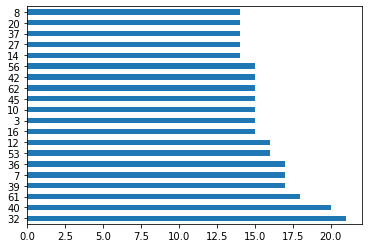

In [17]:
# Top 20 b1 who created the most cards
res['b1'].value_counts()[:20].plot(kind='barh')

<AxesSubplot:>

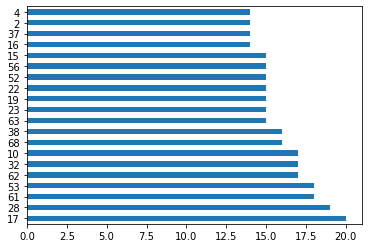

In [18]:
# Top 20 b21 who created the most cards
res['b2'].value_counts()[:20].plot(kind='barh')

<AxesSubplot:>

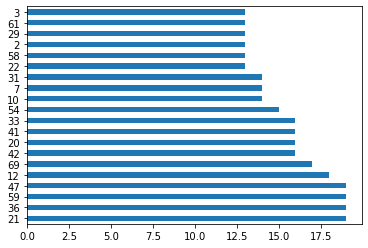

In [19]:
# Top 20 b3 who created the most cards
res['b3'].value_counts()[:20].plot(kind='barh')

<AxesSubplot:>

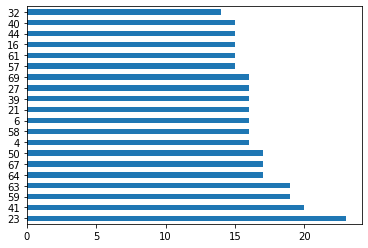

In [20]:
# Top 20 b4 who created the most cards
res['b4'].value_counts()[:20].plot(kind='barh')

<AxesSubplot:>

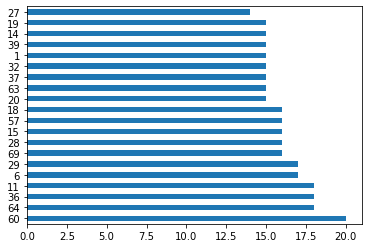

In [21]:
# Top 20 b5 who created the most cards
res['b5'].value_counts()[:20].plot(kind='barh')

<AxesSubplot:>

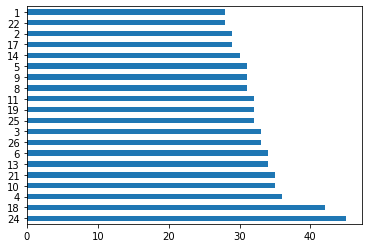

In [22]:
# Top 20 PBall who created the most cards
res['PBall'].value_counts()[:20].plot(kind='barh')